In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import StackingRegressor

In [289]:
df=pd.read_csv("./Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [290]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [291]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [292]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [293]:
j=df.dtypes
col=[]
for i in df.columns:
    print(i,j[i])
    if j[i]!="int64":
        col.append(i)
col

price int64
area int64
bedrooms int64
bathrooms int64
stories int64
mainroad object
guestroom object
basement object
hotwaterheating object
airconditioning object
parking int64
furnishingstatus object


['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'furnishingstatus']

In [294]:
Df=df.copy(deep=True)

In [295]:
for i in range(6):
    Df[col[i]]=pd.factorize(df[col[i]])[0]

In [296]:
Df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,2,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,0
2,12250000,9960,3,2,2,0,0,1,0,1,2,1
3,12215000,7500,4,2,2,0,0,1,0,0,3,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,0,1,0,1,2,2
541,1767150,2400,3,1,1,1,0,0,0,1,0,1
542,1750000,3620,2,1,1,0,0,0,0,1,0,2
543,1750000,2910,3,1,1,1,0,0,0,1,0,0


In [297]:
concol=[]
for i in df.columns:
    if i not in col:
        Df[i]=df[i]
        concol.append(i)
        print(i)

price
area
bedrooms
bathrooms
stories
parking


In [298]:
Df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,2,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,0
2,12250000,9960,3,2,2,0,0,1,0,1,2,1
3,12215000,7500,4,2,2,0,0,1,0,0,3,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,0,1,0,1,2,2
541,1767150,2400,3,1,1,1,0,0,0,1,0,1
542,1750000,3620,2,1,1,0,0,0,0,1,0,2
543,1750000,2910,3,1,1,1,0,0,0,1,0,0


In [299]:
mx=Df[["price","area"]].quantile(0.98)
mn=Df[["price","area"]].quantile(0.02)
c=0
for i in range(Df["area"].size):
    if  Df["price"][i]>=mx[0]  or Df["price"][i]<=mn[0] or Df["area"][i]>=mx[1] or Df["area"][i]<=mn[1]:
        c=c+1
        Df=Df.drop(i)
c

46

In [300]:
Df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
11,9681000,6000,4,3,2,0,1,1,1,1,2,1
12,9310000,6550,4,2,2,0,0,0,0,0,1,1
13,9240000,3500,4,2,2,0,0,0,1,1,2,0
14,9240000,7800,3,2,2,0,0,0,0,1,0,1
15,9100000,6000,4,1,2,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,2310000,3180,2,1,1,0,0,0,0,1,0,2
528,2275000,3970,1,1,1,1,0,0,0,1,0,2
529,2275000,3970,3,1,2,0,0,1,0,1,0,2
531,2233000,5300,3,1,1,1,0,0,0,0,0,2


In [301]:
sc=StandardScaler().fit(np.array(Df["area"]).reshape(-1,1))
Dft=Df.copy(deep=True)
Dft["area"]=sc.transform(np.array(Df["area"]).reshape(-1,1))

In [302]:
Dft

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
11,9681000,0.519958,4,3,2,0,1,1,1,1,2,1
12,9310000,0.827258,4,2,2,0,0,0,0,0,1,1
13,9240000,-0.876863,4,2,2,0,0,0,1,1,2,0
14,9240000,1.525669,3,2,2,0,0,0,0,1,0,1
15,9100000,0.519958,4,1,2,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,2310000,-1.055656,2,1,1,0,0,0,0,1,0,2
528,2275000,-0.614261,1,1,1,1,0,0,0,1,0,2
529,2275000,-0.614261,3,1,2,0,0,1,0,1,0,2
531,2233000,0.128848,3,1,1,1,0,0,0,0,0,2


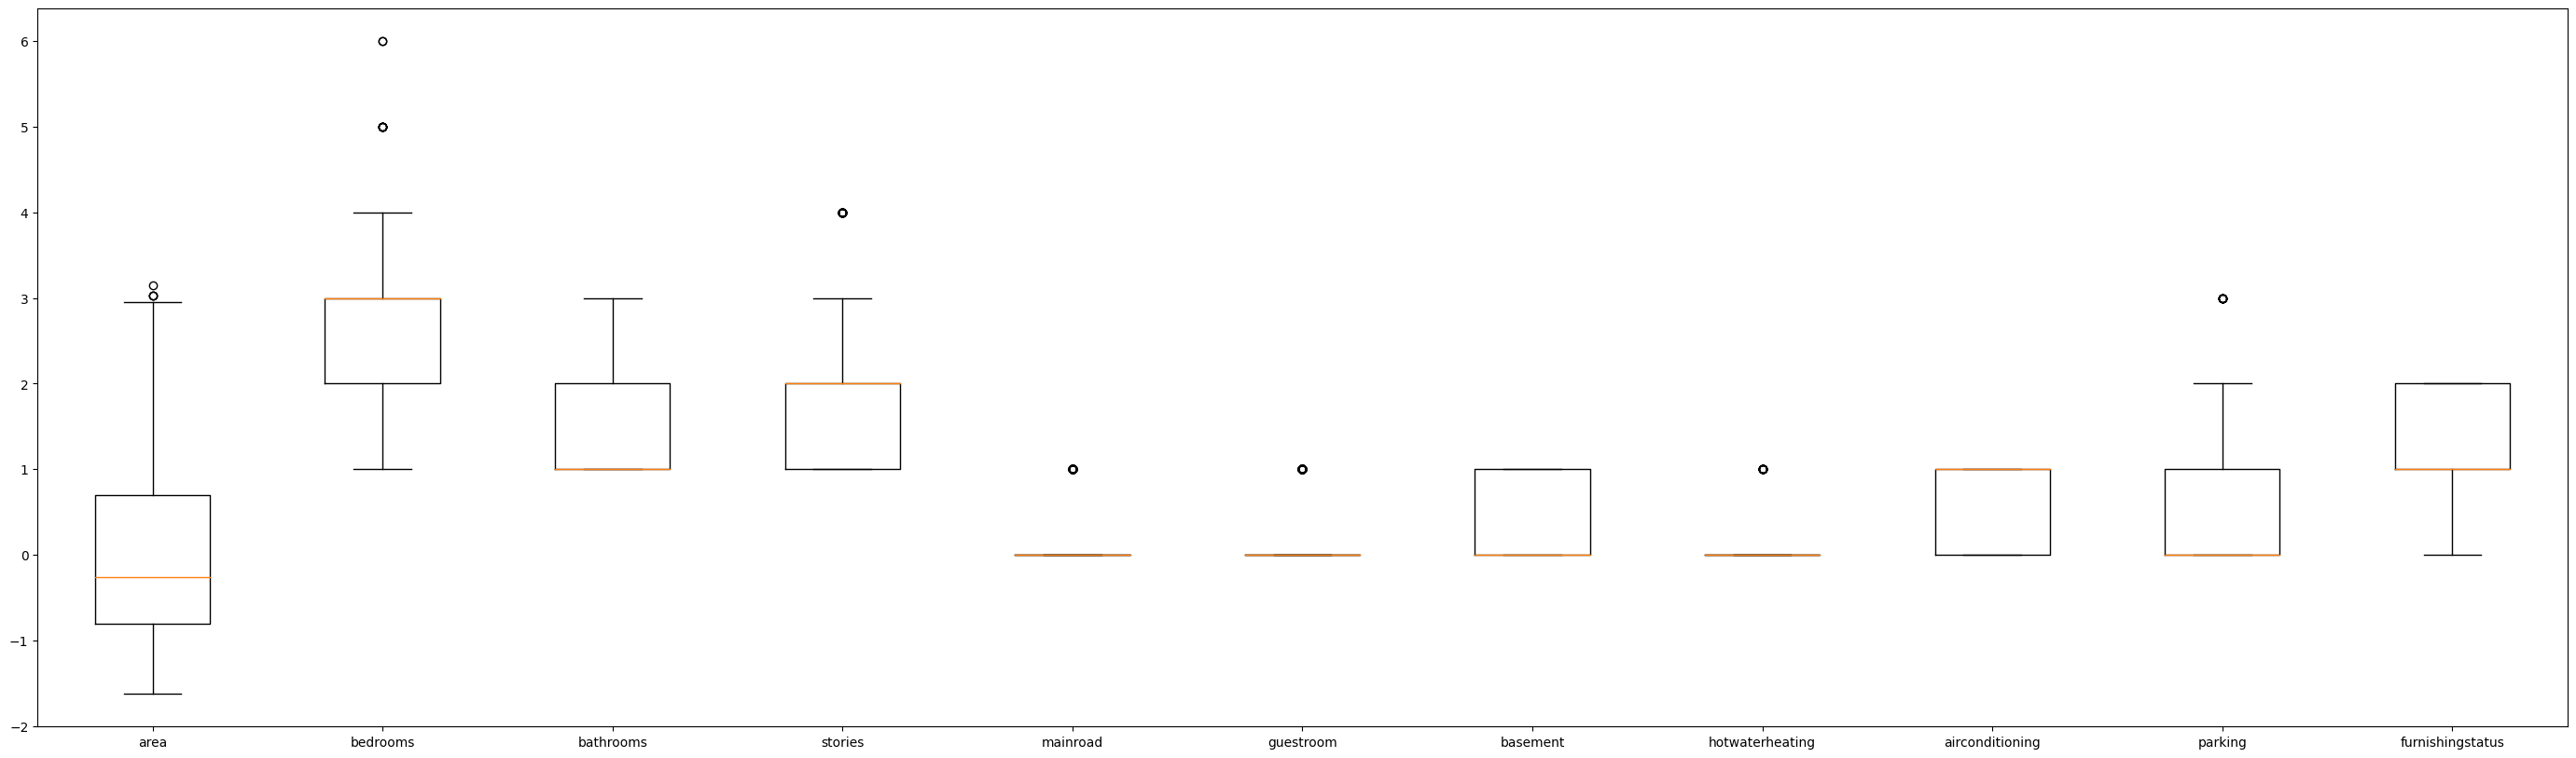

In [303]:
_=plt.figure(figsize=(35,10))
_=plt.boxplot(Dft.drop("price",axis=1),labels=Dft.drop("price",axis=1).columns)

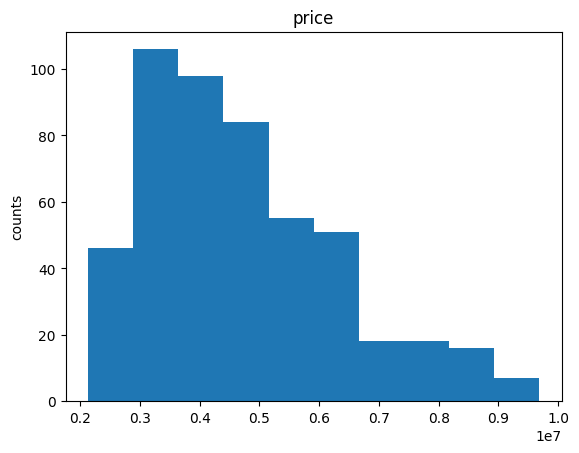

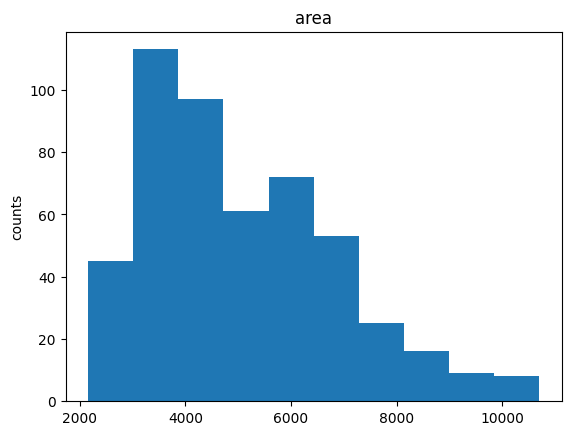

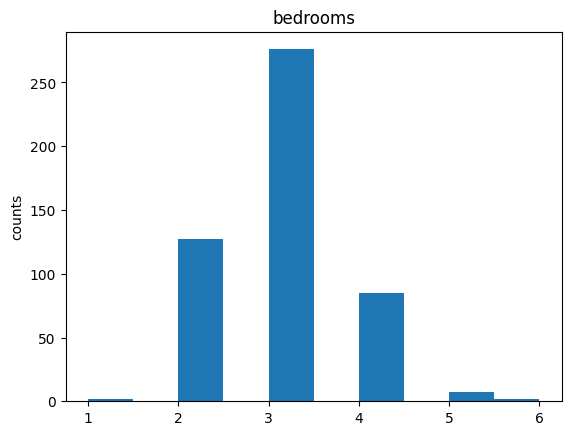

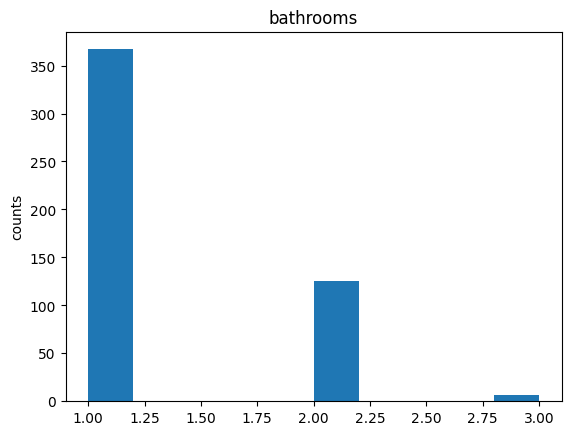

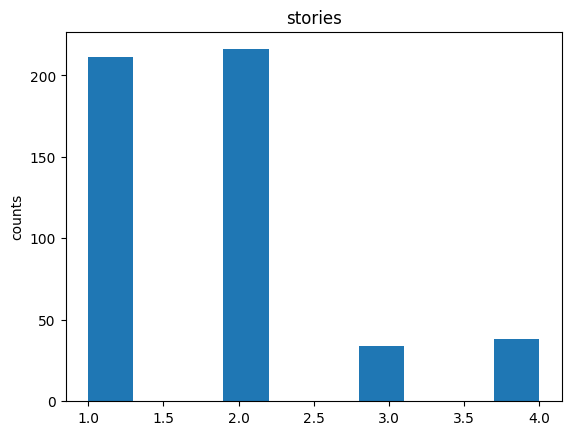

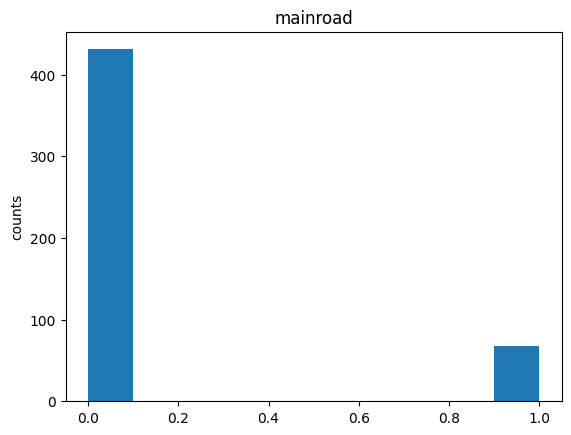

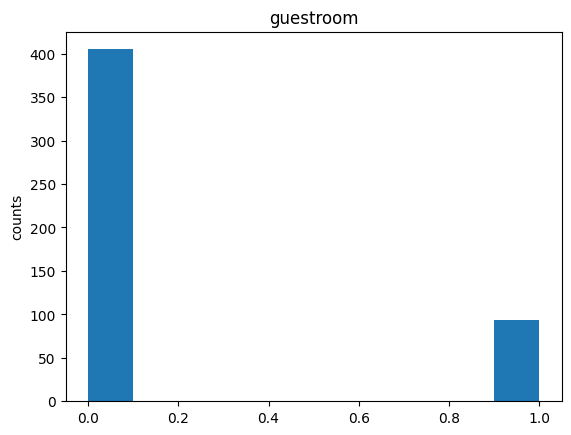

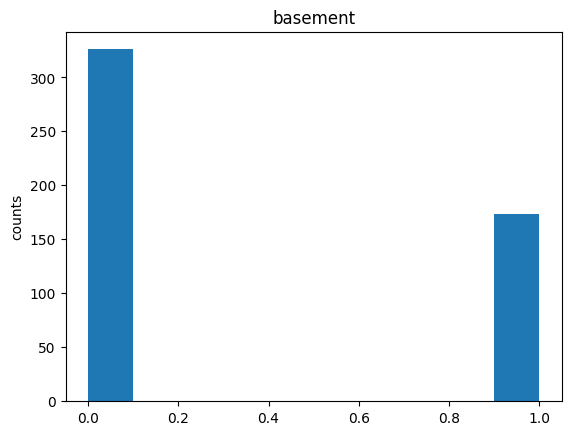

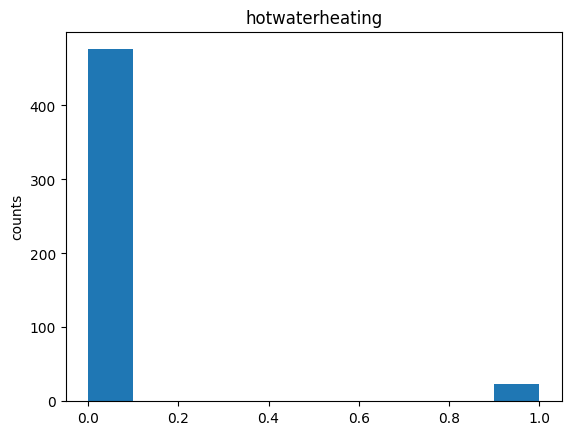

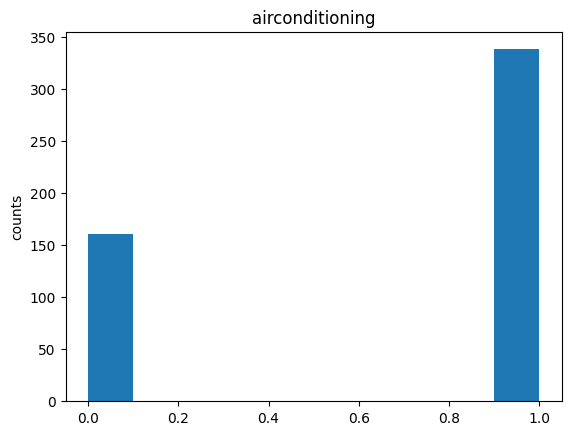

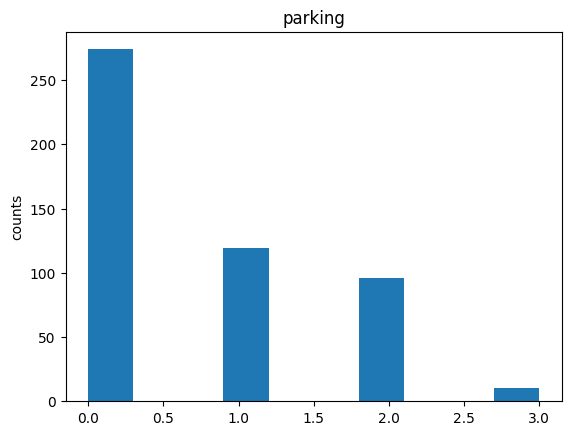

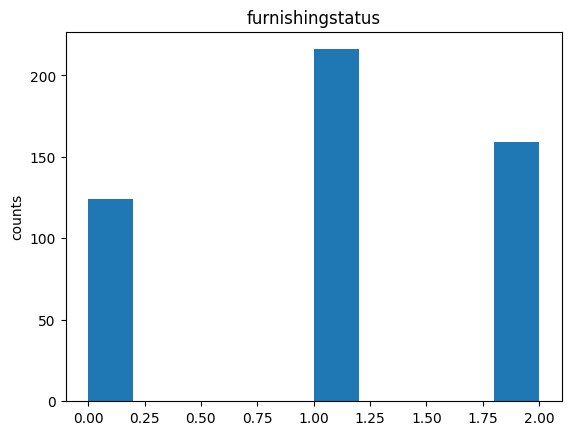

In [304]:
for i in Df.columns:
    plt.hist(Df[i])
    plt.ylabel("counts")
    plt.title(i)
    plt.show()

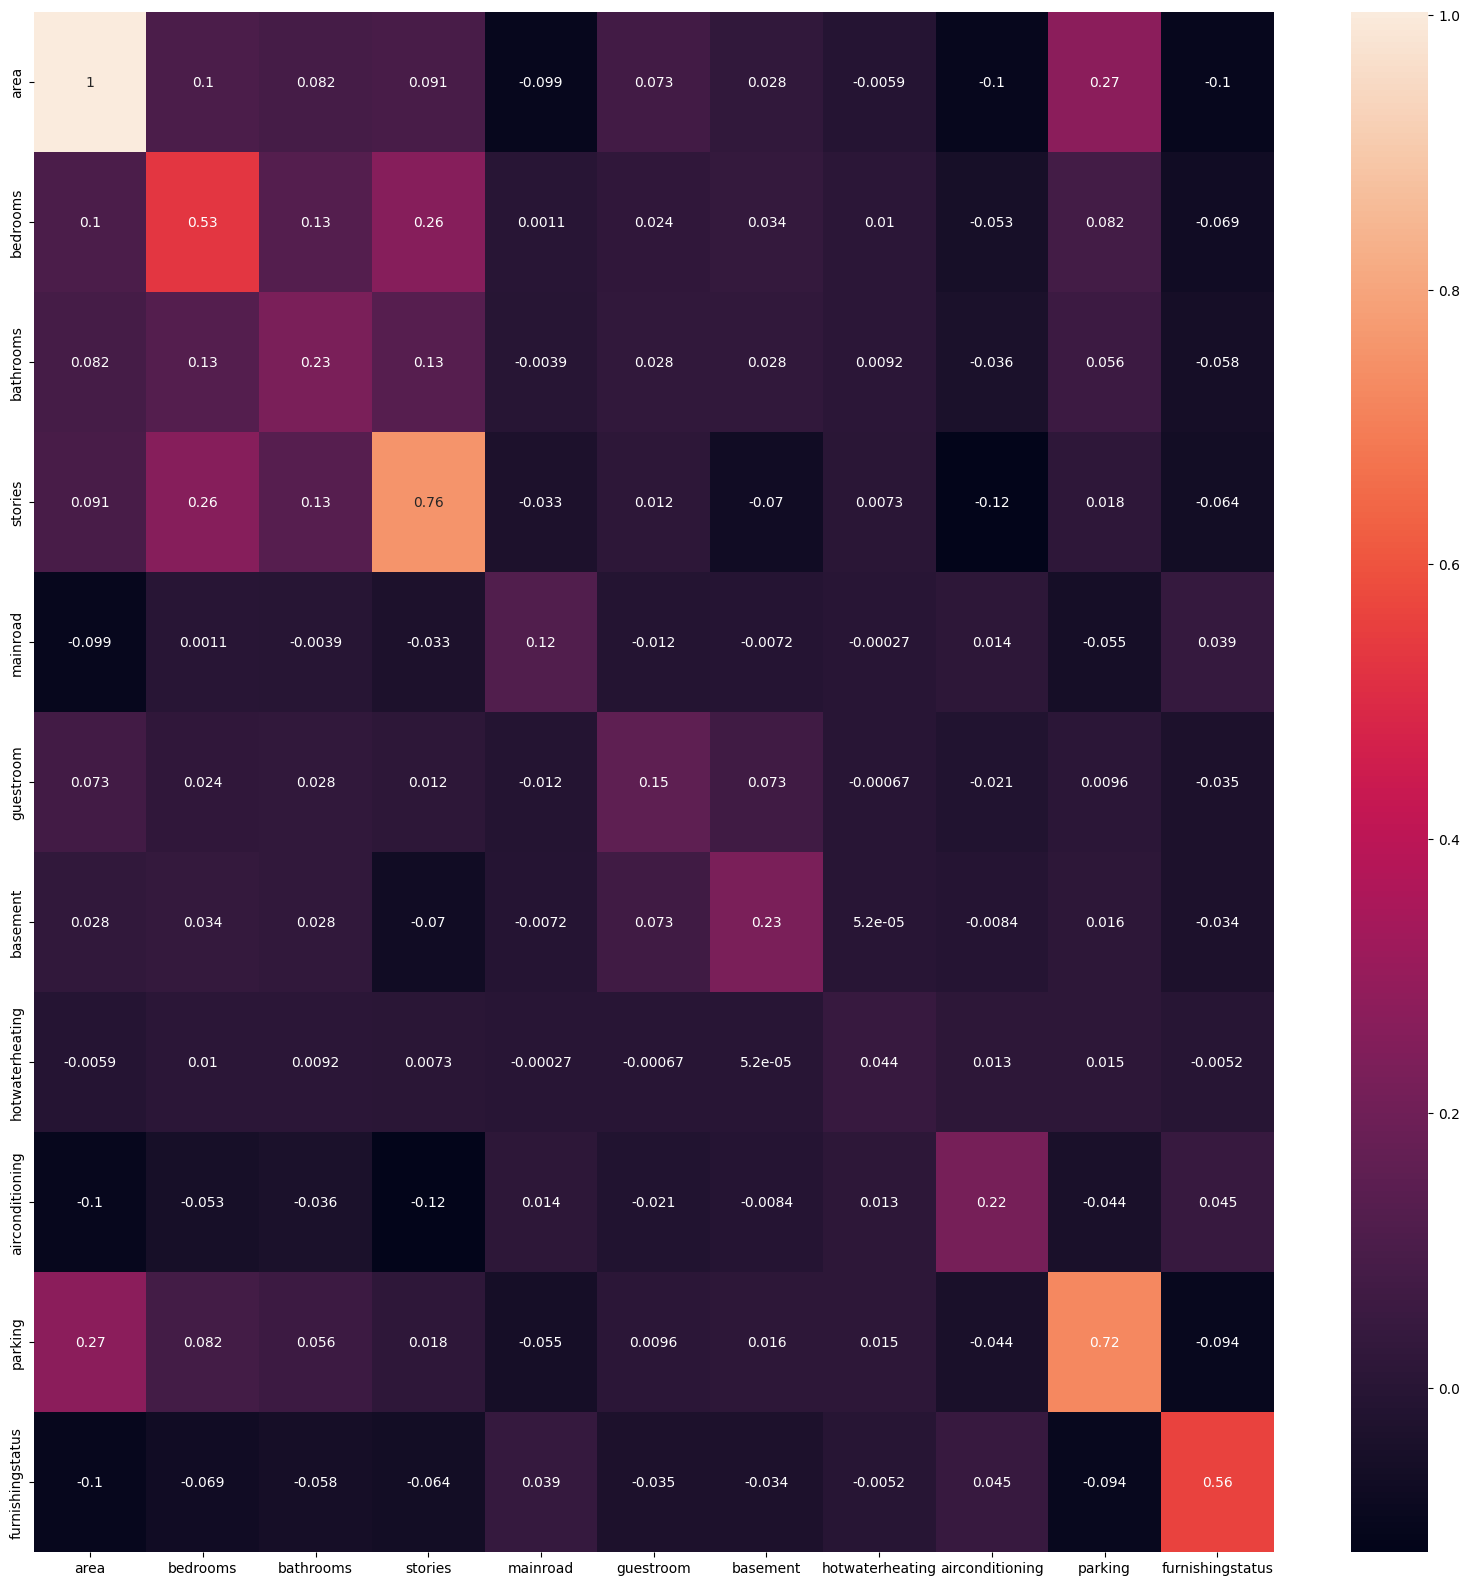

In [305]:
pc=PCA(random_state=170).fit(Dft.drop(labels="price",axis=1),Dft["price"])
_=plt.figure(figsize=(20,20))
_=sns.heatmap(pc.get_covariance(),annot=True,xticklabels=Dft.drop(labels="price",axis=1).columns,yticklabels=Dft.drop(labels="price",axis=1).columns)

In [306]:
pc.explained_variance_ratio_,pc.explained_variance_ratio_[0:5].sum()

(array([0.2956199 , 0.19569963, 0.12752662, 0.11286053, 0.08558495,
        0.05349552, 0.03943375, 0.03656314, 0.02243617, 0.02164764,
        0.00913217]),
 0.8172916131972564)

In [307]:
x=Dft.drop(labels="price",axis=1)
y=Dft["price"]

In [308]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [309]:
def plt_dat(ytrac,ytrpr,yteac,ytepr):
    plt.figure(figsize=(20,5))
    # plt.plot(np.arange(ytrpr.size),ytrpr,label="train pr")
    # plt.plot(np.arange(ytrac.size),ytrac,label="train ac",alpha=0.7)
    plt.scatter(ytrpr,ytrac)
    # plt.legend()
    plt.show()
    plt.figure(figsize=(20,5))
    # plt.plot(np.arange(ytepr.size),ytepr,label="test pr")
    # plt.plot(np.arange(yteac.size),yteac,label="test ac",alpha=0.7)
    plt.scatter(ytepr,yteac)
    # plt.legend()
    plt.show()

In [338]:
rf=RandomForestRegressor(random_state=170,max_depth=5,max_leaf_nodes=12).fit(x_train,y_train)
rf.score(x_train,y_train),rf.score(x_test,y_test)

(0.6898224637296724, 0.510629638126069)

In [311]:
pcr=LinearRegression().fit(pc.transform(x_train),y_train)
pcr.score(x_train,y_train),pcr.score(x_test,y_test)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


(-0.9420676138924198, -0.7372878592017191)

In [312]:
lr=LinearRegression().fit(x_train,y_train)
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.6221127139639461, 0.6246099784877881)

In [313]:
params={"random_state":[170],"max_iter":[300],"learning_rate_init":np.arange(1,stop=10,step=0.1),"solver":["adam","lbfgs"]}
grid=GridSearchCV(MLPRegressor(),param_grid=params,n_jobs=-1,return_train_score=True)
grid.fit(x_train,y_train)

GridSearchCV(estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'learning_rate_init': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
                         'max_iter': [300], 'random_state': [170],
                         'solver': ['adam', 'lbfgs']},
             return_train_score=True)

In [314]:
grid.score(x_train,y_train),grid.score(x_test,y_test)
grid.best_params_

{'learning_rate_init': 9.8,
 'max_iter': 300,
 'random_state': 170,
 'solver': 'adam'}

In [315]:
mlpr=MLPRegressor(**grid.best_params_).fit(x_train,y_train)
mlpr.score(x_train,y_train),mlpr.score(x_test,y_test)

(0.6214559595022338, 0.6254286291802558)

In [316]:
kn=KNeighborsRegressor(n_jobs=-1,n_neighbors=5).fit(x_train,y_train)
kn.score(x_train,y_train),kn.score(x_test,y_test)

(0.6944928243531306, 0.5662417904360587)

In [317]:
plsr=PLSRegression().fit(x_train,y_train)
plsr.score(x_train,y_train),plsr.score(x_test,y_test)

(0.6210797347939714, 0.6305836858377066)

In [318]:
las=Lasso(random_state=170).fit(x_train,y_train)
las.score(x_train,y_train),las.score(x_test,y_test)

(0.622112713946037, 0.6246097976073116)

In [319]:
rid=Ridge().fit(x_train,y_train)
rid.score(x_train,y_train),rid.score(x_test,y_test)

(0.6220426822244527, 0.6244754288954595)

In [320]:
mtl=StackingRegressor(n_jobs=-1,estimators=[['lr',lr],['mlpr',mlpr],['kn',kn],['plsr',plsr],['rf',rf],['pcr',pcr],['las',las],['rid',rid]],final_estimator=MLPRegressor(random_state=170)).fit(x_train,y_train)
mtl.score(x_train,y_train),mtl.score(x_test,y_test)

(0.6411278329363317, 0.62816410928456)

In [321]:
def regmetrcis(model,name,y_train=y_train,y_test=y_test,x_train=x_train,x_test=x_test):
    res=[]
    # print("---------------------------------")
    # print("model: "+name+"\n")
    # print("On train")
    # print("r2score:\n"+str(model.score(x_train,y_train)))
    # print("Mean Absolute Error:\n"+str(mean_absolute_error(y_train,model.predict(x_train))))
    # print("Mean Absolute Percentage Error:\n"+str(mean_absolute_percentage_error(y_train,model.predict(x_train))))
    # print("Mean Square Error:\n"+str(mean_squared_error(y_train,model.predict(x_train))))
    # print("Root Mean Square Error:\n"+str(mean_squared_error(y_train,model.predict(x_train),squared=False)))
    # print("Median Absolute Error:\n"+str(median_absolute_error(y_train,model.predict(x_train))))
    # print("\nOn test")
    # print("r2score:\n"+str(model.score(x_test,y_test)))
    # print("Mean Absolute Error:\n"+str(mean_absolute_error(y_test,model.predict(x_test))))
    # print("Mean Absolute Percentage Error:\n"+str(mean_absolute_percentage_error(y_test,model.predict(x_test))))
    # print("Mean Square Error:\n"+str(mean_squared_error(y_test,model.predict(x_test))))
    # print("Root Mean Square Error:\n"+str(mean_squared_error(y_test,model.predict(x_test),squared=False)))
    # print("Median Absolute Error:\n"+str(median_absolute_error(y_test,model.predict(x_test))))
    # print("---------------------------------")
    res.append(name)
    # res.append("On train")
    res.append((model.score(x_train,y_train)))
    res.append((mean_absolute_error(y_train,model.predict(x_train))))
    res.append((mean_absolute_percentage_error(y_train,model.predict(x_train))))
    res.append((mean_squared_error(y_train,model.predict(x_train))))
    res.append((mean_squared_error(y_train,model.predict(x_train),squared=False)))
    res.append((median_absolute_error(y_train,model.predict(x_train))))
    # res.append("On test")
    res.append((model.score(x_test,y_test)))
    res.append((mean_absolute_error(y_test,model.predict(x_test))))
    res.append((mean_absolute_percentage_error(y_test,model.predict(x_test))))
    res.append((mean_squared_error(y_test,model.predict(x_test))))
    res.append((mean_squared_error(y_test,model.predict(x_test),squared=False)))
    res.append((median_absolute_error(y_test,model.predict(x_test))))
    return res

In [322]:
col=["model","train r2score","train Mean Absolute Error","train Mean Absolute Percentage Error","train Mean Squared error","train Root Mean Squared Error","train Median Absolute Error",
     "test r2score","test Mean Absolute Error","test Mean Absolute Percentage Error","test Mean Squared error","test Root Mean Squared Error","test Median Absolute Error"]

In [334]:
op=pd.DataFrame([regmetrcis(kn,"KNeighborsRegressor"),regmetrcis(rf,"RandomForestRegressor"),regmetrcis(mlpr,"MLPRegressor"),regmetrcis(lr,"LinearRegression"),
              regmetrcis(plsr,"PLSRegression"),regmetrcis(rid,"Ridge"),regmetrcis(las,"Lasso"),regmetrcis(mtl,"StackingRegressor")],columns=col)

In [335]:
op

,model,train r2score,train Mean Absolute Error,train Mean Absolute Percentage Error,train Mean Squared error,train Root Mean Squared Error,train Median Absolute Error,test r2score,test Mean Absolute Error,test Mean Absolute Percentage Error,test Mean Squared error,test Root Mean Squared Error,test Median Absolute Error
0,KNeighborsRegressor,0.694493,642796.636364,0.141145,7.821109e+11,884370.352956,443800.000000,0.566242,729519.728000,0.148552,1.146628e+12,1.070807e+06,469000.000000
1,RandomForestRegressor,0.689822,686963.584749,0.156572,7.940672e+11,891104.503558,583027.513768,0.510630,830375.352838,0.176001,1.293638e+12,1.137382e+06,624807.091635
2,MLPRegressor,0.621456,748264.286038,0.171370,9.690883e+11,984422.823725,591160.787852,0.625429,725750.638126,0.152589,9.901696e+11,9.950726e+05,551783.467487
3,LinearRegression,0.622113,745408.684707,0.169694,9.674070e+11,983568.491497,578716.975040,0.624610,723406.394092,0.151045,9.923336e+11,9.961594e+05,544862.129224
4,PLSRegression,0.621080,748974.970918,0.170493,9.700514e+11,984911.897877,574863.935524,0.630584,720772.374357,0.151045,9.765423e+11,9.882015e+05,562715.922468
5,Ridge,0.622043,744625.655033,0.169431,9.675863e+11,983659.626902,581373.888027,0.624475,722785.677788,0.150791,9.926893e+11,9.963380e+05,549771.975572
6,Lasso,0.622113,745408.104615,0.169694,9.674070e+11,983568.491521,578712.668833,0.624610,723405.992057,0.151044,9.923341e+11,9.961597e+05,544867.901118
7,StackingRegressor,0.641128,729704.357164,0.168123,9.187275e+11,958502.734308,559380.404035,0.628164,720328.967411,0.152261,9.829384e+11,9.914325e+05,603349.527410
